# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import time

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
import os
cwd = os.getcwd()
ParentDir=os.path.abspath(os.path.join(cwd, os.pardir))
OutputDir=ParentDir + "\\OutputData" + "\\" 

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather  = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat      = city_weather["coord"]["lat"]
        city_lng      = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds   = city_weather["clouds"]["all"]
        city_wind     = city_weather["wind"]["speed"]
        city_country  = city_weather["sys"]["country"]
        city_date     = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | moose factory
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | basco
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | cabra
Processing Record 11 of Set 1 | codrington
Processing Record 12 of Set 1 | vetapalem
Processing Record 13 of Set 1 | buala
Processing Record 14 of Set 1 | novoagansk
Processing Record 15 of Set 1 | portland
Processing Record 16 of Set 1 | ergani
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | great falls
Processing Record 19 of Set 1 | victoria
Processing Record 20 of Set 1 | vao
Processing Record 21 of Set 1 | pisco
Processing Record 22 of Set 1 | harper
Processing Record 23 of Set 1 | souillac
Processi

Processing Record 35 of Set 4 | lebu
Processing Record 36 of Set 4 | narsaq
Processing Record 37 of Set 4 | timra
Processing Record 38 of Set 4 | faanui
Processing Record 39 of Set 4 | hobara
Processing Record 40 of Set 4 | colgong
Processing Record 41 of Set 4 | dingle
Processing Record 42 of Set 4 | teguise
Processing Record 43 of Set 4 | airai
Processing Record 44 of Set 4 | phan rang
City not found. Skipping...
Processing Record 45 of Set 4 | bontang
Processing Record 46 of Set 4 | taltal
Processing Record 47 of Set 4 | jurado
Processing Record 48 of Set 4 | lolua
City not found. Skipping...
Processing Record 49 of Set 4 | fort saint john
City not found. Skipping...
Processing Record 0 of Set 5 | ouesso
Processing Record 1 of Set 5 | barroualie
City not found. Skipping...
Processing Record 2 of Set 5 | saint anthony
Processing Record 3 of Set 5 | bengkulu
Processing Record 4 of Set 5 | galle
Processing Record 5 of Set 5 | mayor pablo lagerenza
Processing Record 6 of Set 5 | ugoofaa

Processing Record 24 of Set 8 | urbino
Processing Record 25 of Set 8 | gallup
Processing Record 26 of Set 8 | klaksvik
Processing Record 27 of Set 8 | buluang
Processing Record 28 of Set 8 | cap malheureux
Processing Record 29 of Set 8 | alofi
Processing Record 30 of Set 8 | puri
Processing Record 31 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 32 of Set 8 | boende
Processing Record 33 of Set 8 | corner brook
Processing Record 34 of Set 8 | sonqor
Processing Record 35 of Set 8 | tostamaa
City not found. Skipping...
Processing Record 36 of Set 8 | ucluelet
Processing Record 37 of Set 8 | port hawkesbury
Processing Record 38 of Set 8 | maldonado
Processing Record 39 of Set 8 | salinopolis
Processing Record 40 of Set 8 | hofn
Processing Record 41 of Set 8 | cidreira
Processing Record 42 of Set 8 | asau
Processing Record 43 of Set 8 | hamilton
Processing Record 44 of Set 8 | saint-pierre
Processing Record 45 of Set 8 | miri
Processing Record 46 of Set 8 | lecce
Proces

Processing Record 13 of Set 12 | mbeya
Processing Record 14 of Set 12 | micheweni
Processing Record 15 of Set 12 | dwarka
Processing Record 16 of Set 12 | pafos
Processing Record 17 of Set 12 | ambilobe
Processing Record 18 of Set 12 | zhigansk
Processing Record 19 of Set 12 | erenhot
Processing Record 20 of Set 12 | monte cristi
City not found. Skipping...
Processing Record 21 of Set 12 | margate
Processing Record 22 of Set 12 | fort nelson
Processing Record 23 of Set 12 | mehkerek
Processing Record 24 of Set 12 | oxelosund
Processing Record 25 of Set 12 | fez
Processing Record 26 of Set 12 | abu samrah
Processing Record 27 of Set 12 | kaitong
Processing Record 28 of Set 12 | bahir dar
Processing Record 29 of Set 12 | olga
Processing Record 30 of Set 12 | viljoenskroon
Processing Record 31 of Set 12 | buqayq
City not found. Skipping...
Processing Record 32 of Set 12 | polyarnyy
Processing Record 33 of Set 12 | price
Processing Record 34 of Set 12 | oranjemund
Processing Record 35 of S

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,-46.1927,168.8643,10.27,37,16,2.75,NZ,1670295825
1,yellowknife,62.4560,-114.3525,-35.25,66,15,2.68,CA,1670295687
2,jamestown,42.0970,-79.2353,6.77,40,75,4.63,US,1670295826
3,moose factory,51.2585,-80.6094,-19.01,78,100,5.14,CA,1670295826
4,bluff,-46.6000,168.3333,10.45,59,10,5.90,NZ,1670295827


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv(OutputDir+"cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv(OutputDir+"cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mataura,-46.1927,168.8643,10.27,37,16,2.75,NZ,1670295825
1,yellowknife,62.4560,-114.3525,-35.25,66,15,2.68,CA,1670295687
2,jamestown,42.0970,-79.2353,6.77,40,75,4.63,US,1670295826
3,moose factory,51.2585,-80.6094,-19.01,78,100,5.14,CA,1670295826
4,bluff,-46.6000,168.3333,10.45,59,10,5.90,NZ,1670295827


### Create the Scatter Plots Requested

In [9]:
# define functionb to build scatter plot for latitude vs. (1) max temperature (c) (2) humidity (3) cloudiness (4) Wind Speed

def ScatterPlot(param,name):
    plt.scatter(city_data_df["Lat"], city_data_df[param], marker='o', edgecolor='black', facecolor='tab:blue')
    # Incorporate the other graph properties
    plt.xlabel("Latitute", fontsize=12)
    plt.ylabel(name, fontsize=12)
    plt.title("City Latitude" + " " +"vs." + " " + name + " " + "(" +\
              str(time.gmtime(city_data_df["Date"][0])[0]) + "-" + str(time.gmtime(city_data_df["Date"][0])[1]) + "-" +\
              str(time.gmtime(city_data_df["Date"][0])[2]) + ")", fontsize=14)
    plt.grid(color='gray', linestyle='dashed')
    plt.gcf().set_size_inches(8, 7)
    # Save the figure
    plt.savefig(OutputDir + param + ".png")
    # Show plot
    plt.show()

#### Latitude Vs. Temperature

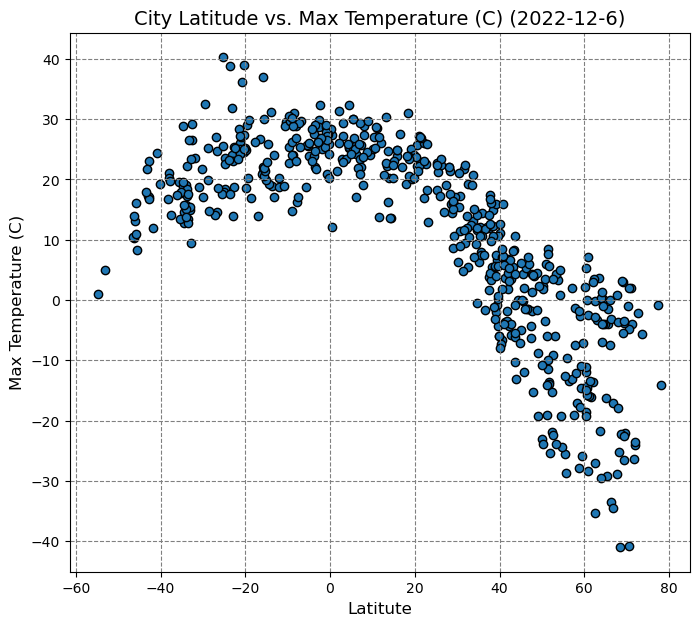

In [10]:
ScatterPlot("Max Temp","Max Temperature (C)")

#### Latitude Vs. Humidity

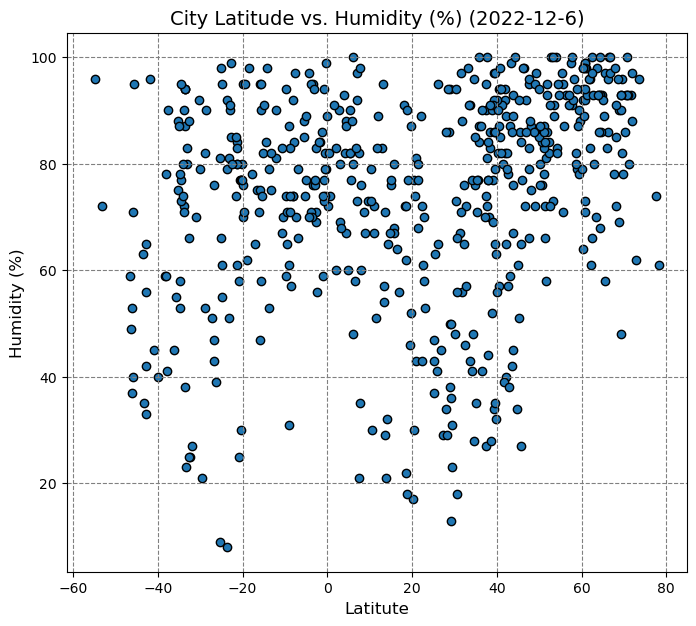

In [11]:
ScatterPlot("Humidity","Humidity (%)")

#### Latitude Vs. Cloudiness

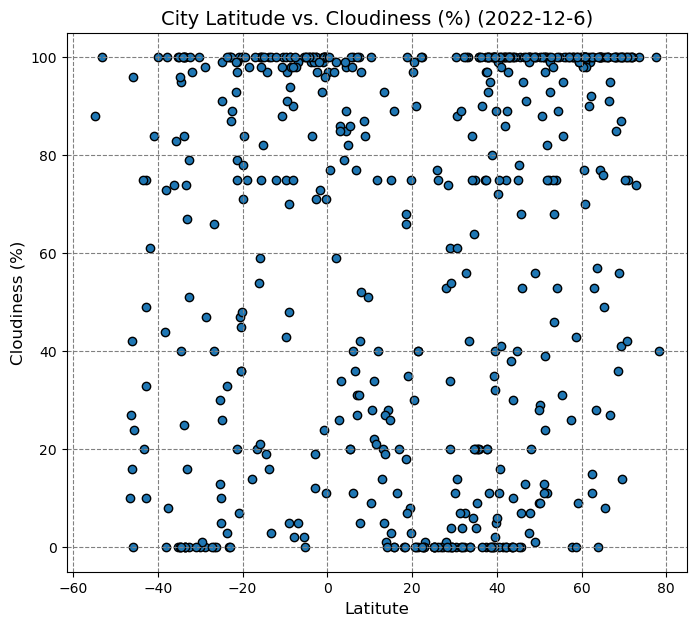

In [12]:
ScatterPlot("Cloudiness","Cloudiness (%)")

#### Latitude vs. Wind Speed Plot

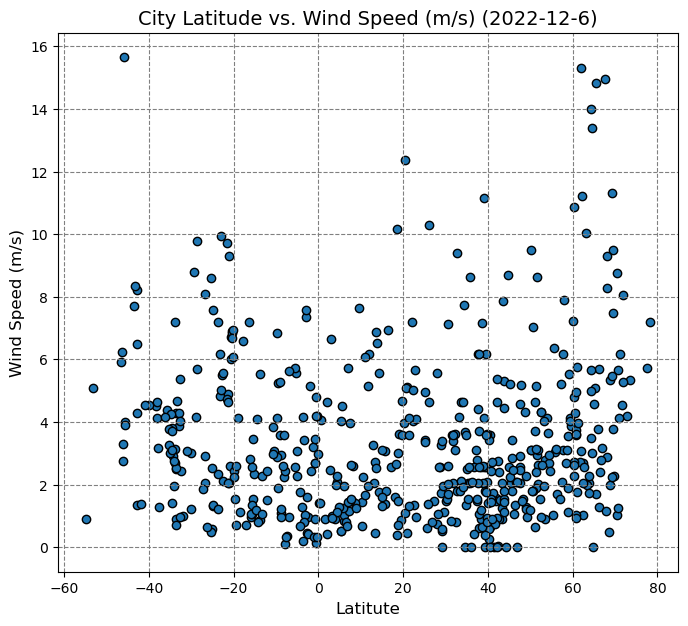

In [13]:
ScatterPlot("Wind Speed","Wind Speed (m/s)")

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>=0]

# Create a DataFrame with the Southern Hemisphere data (Latitude >= 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]<0]

# Define a function to create Linear Regression plots
def LRPlot(paramo,nameo):
    hemisphere=[northern_hemi_df,southern_hemi_df]
    hemispherename=["Northern Hemisphere","Southern Hemisphere"]
    for bowl in hemisphere:
        x_values = bowl["Lat"]
        y_values = bowl[paramo]
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        regress_values = x_values * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        r2="r-value: " + str(round(rvalue,2))
        plt.scatter(x_values,y_values)
        plt.plot(x_values,regress_values,"r-")
        handles, labels = plt.gca().get_legend_handles_labels()
        patch_1 = mpatches.Patch(color='none', label=line_eq)
        patch_2 = mpatches.Patch(color='none', label=r2)
        handles.extend([patch_1, patch_2])
        plt.legend(fontsize=14, loc='best',handlelength=0, handletextpad=0, fancybox=True, handles=handles)
        
        plt.xlabel("Latitute", fontsize=12)
        plt.ylabel(nameo, fontsize=12)
        
        if bowl is hemisphere[0]:
            Geo=hemispherename[0] 
        else:
            Geo=hemispherename[1]
            
        plt.title("City Latitude" + " " +"vs." + " " + nameo + " " + "(" +\
            str(time.gmtime(city_data_df["Date"][0])[0]) + "-" + str(time.gmtime(city_data_df["Date"][0])[1]) + "-" +\
                str(time.gmtime(city_data_df["Date"][0])[2]) + ")" + " " + "in" + " " + Geo, fontsize=14)
        plt.gcf().set_size_inches(8, 7)
        print(f"The r-value is {round(rvalue,2)}")
        plt.savefig(OutputDir + paramo + " " + "LR" + " " + Geo +".png")
        plt.show()

In [15]:
# Display sample data for Northern Hemisphere
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,yellowknife,62.4560,-114.3525,-35.25,66,15,2.68,CA,1670295687
2,jamestown,42.0970,-79.2353,6.77,40,75,4.63,US,1670295826
3,moose factory,51.2585,-80.6094,-19.01,78,100,5.14,CA,1670295826
6,basco,20.4487,121.9702,25.76,77,99,12.37,PH,1670295828
9,cabra,37.4725,-4.4421,12.03,90,97,1.47,ES,1670295829


In [16]:
# Display sample data for Southern Hemisphere
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mataura,-46.1927,168.8643,10.27,37,16,2.75,NZ,1670295825
4,bluff,-46.6000,168.3333,10.45,59,10,5.90,NZ,1670295827
5,vaini,-21.2000,-175.2000,26.02,80,79,9.30,TO,1670295827
7,puerto ayora,-0.7393,-90.3518,20.86,94,24,2.68,EC,1670295828
8,bredasdorp,-34.5322,20.0403,12.86,77,95,1.40,ZA,1670295828


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.84


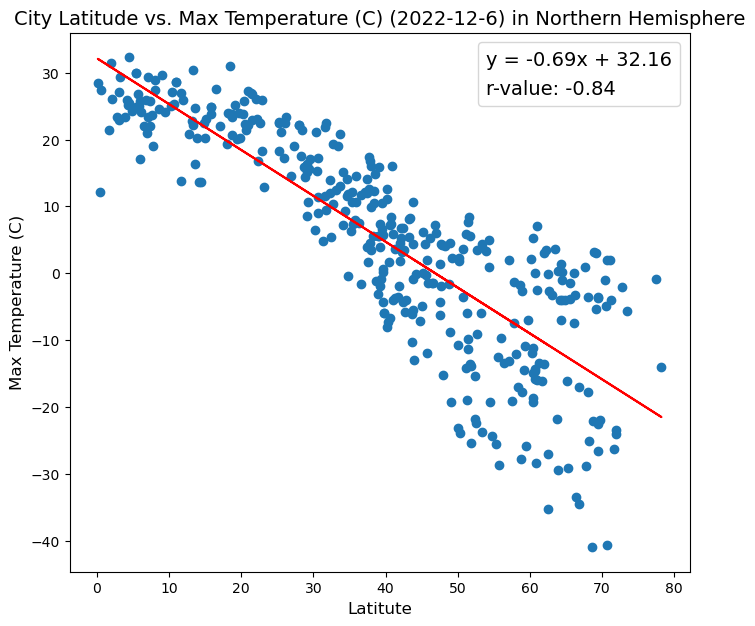

The r-value is 0.57


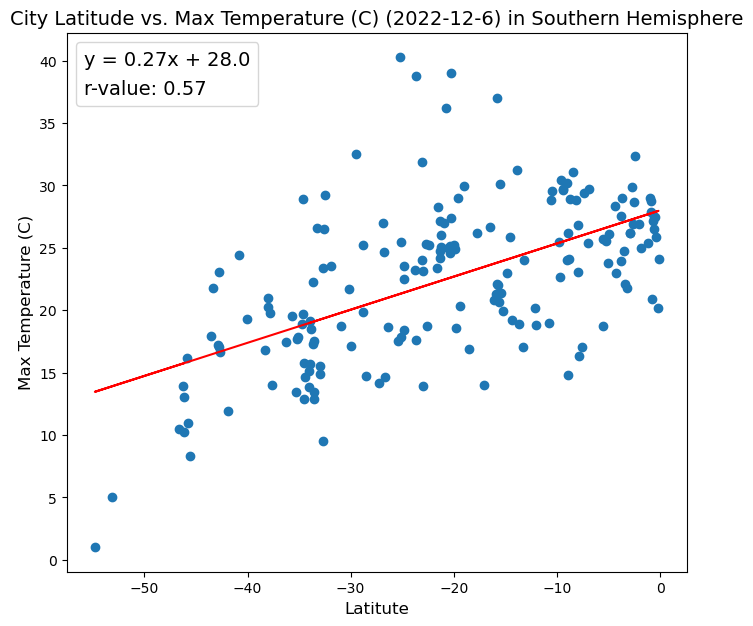

In [17]:
# Linear regression on Northern Hemisphere and Southern Hemisphere
LRPlot("Max Temp","Max Temperature (C)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.36


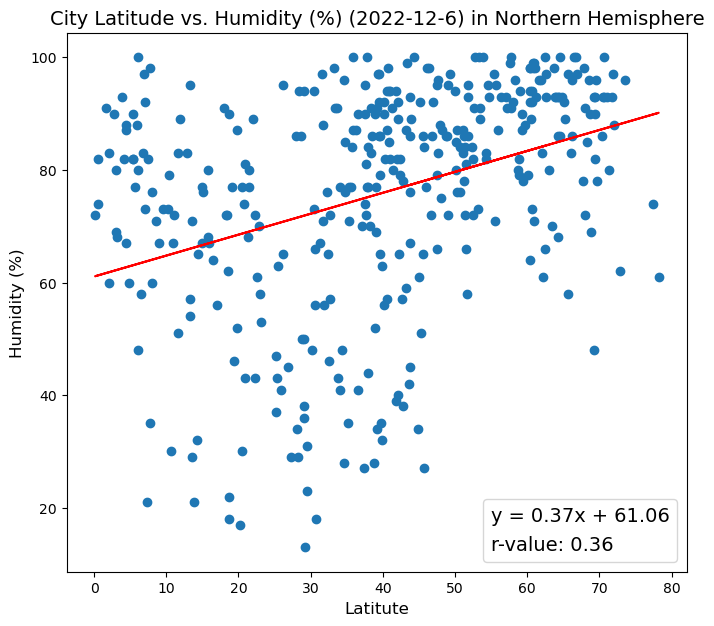

The r-value is 0.29


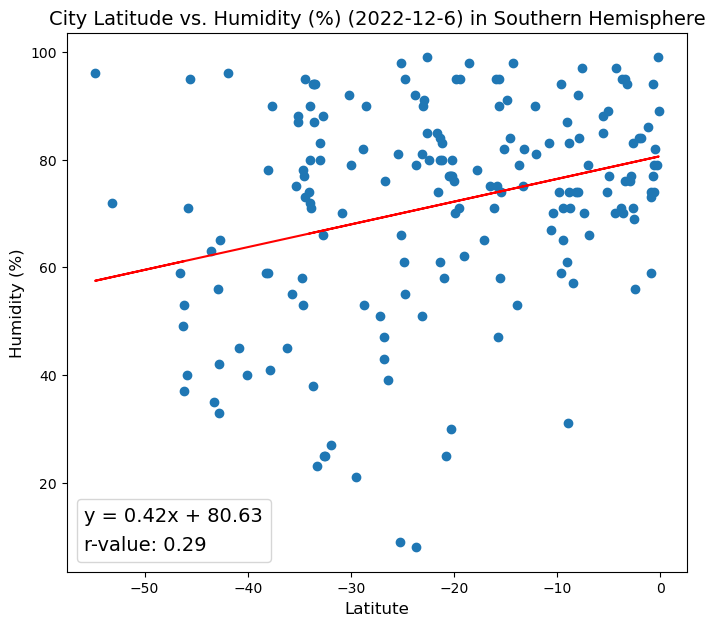

In [18]:
# Linear regression on Northern Hemisphere and Southern Hemisphere
LRPlot("Humidity","Humidity (%)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.3


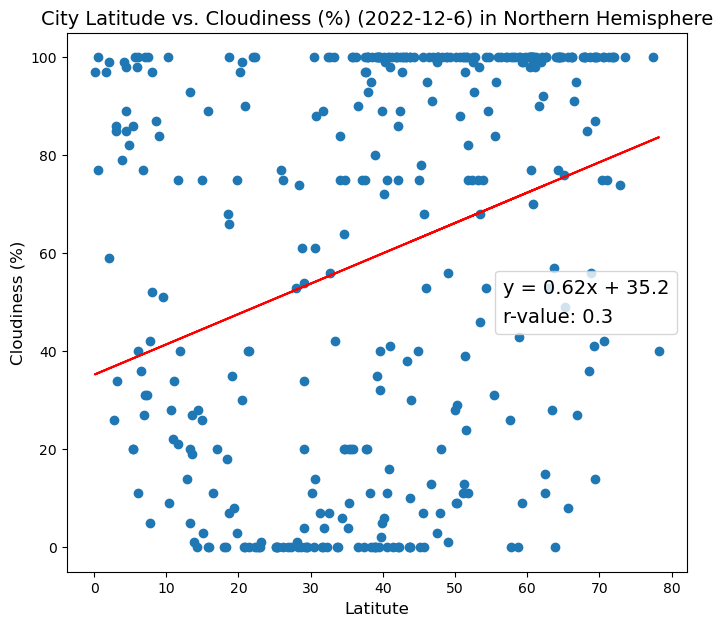

The r-value is 0.29


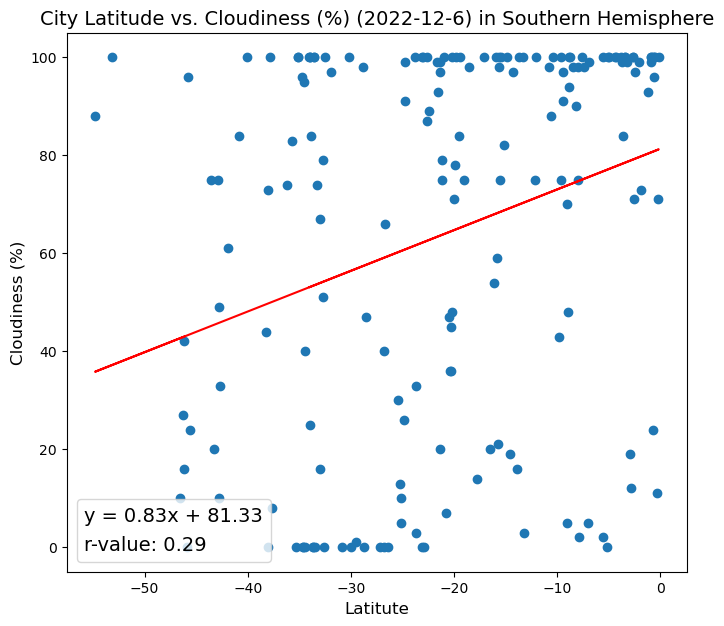

In [19]:
# Linear regression on Northern Hemisphere and Southern Hemisphere
LRPlot("Cloudiness","Cloudiness (%)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.25


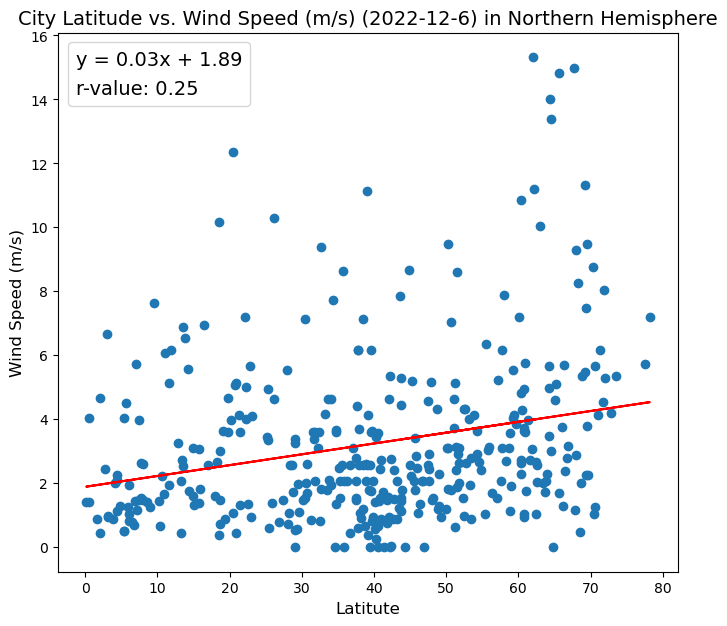

The r-value is -0.27


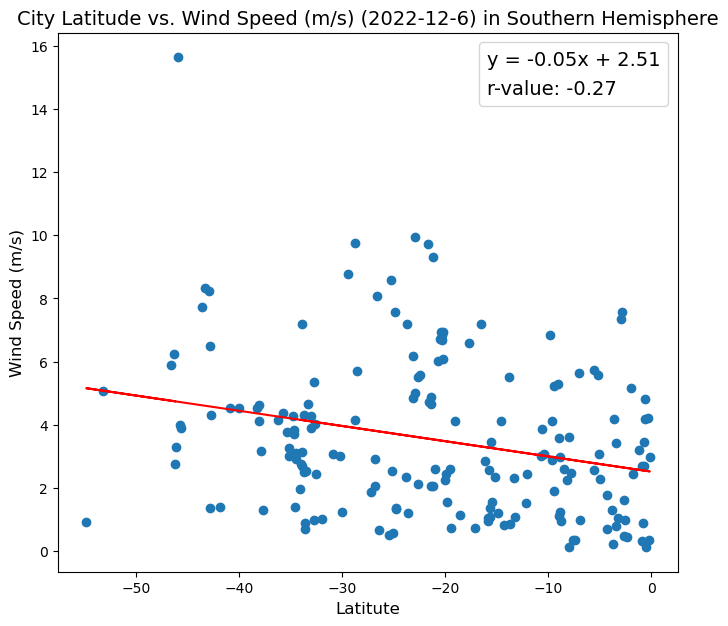

In [20]:
# Linear regression on Northern Hemisphere and Southern Hemisphere
LRPlot("Wind Speed","Wind Speed (m/s)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE